<a href="https://colab.research.google.com/github/jagadeeshkn26/EVA2.0/blob/master/Project7/Quiz/Quiz7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras
import datetime
print(datetime.datetime.now())

2019-06-15 17:29:36.382455


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add,Input
from keras.layers import Conv2D, MaxPooling2D,SeparableConv2D,BatchNormalization
from keras.utils import np_utils
from keras.layers.merge import concatenate
import tensorflow as tf
from keras.models import Model

from keras.datasets import mnist
print(datetime.datetime.now())

2019-06-15 17:32:52.010978


### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(datetime.datetime.now())

2019-06-15 17:31:25.503740


(60000, 28, 28)
2019-06-15 17:31:28.481532


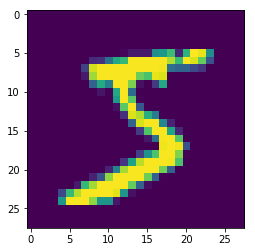

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])
print(datetime.datetime.now())

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
print(datetime.datetime.now())

2019-06-15 17:31:34.771033


In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(datetime.datetime.now())

2019-06-15 17:31:37.953003


In [0]:
y_train[:10]
print(datetime.datetime.now())

2019-06-15 17:31:41.177434


In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print(datetime.datetime.now())

2019-06-15 17:31:46.889733


In [0]:
Y_train[:10]
print(datetime.datetime.now())

2019-06-15 17:31:51.981252


In [0]:
## MAIN BLOCK

from keras.layers import Activation
input_shape = (28,28)+(1,)
x1 = Input(shape = input_shape)
skip_tensor = x1
x2 = SeparableConv2D(32,3,strides=1,padding='same',data_format='channels_last',use_bias=False)(x1)
x2 = BatchNormalization(axis = 3)(x2)
x2 = Activation('relu')(x2)

skip_tensor = concatenate([skip_tensor, x2])


x3 = SeparableConv2D(64,3,strides=1,padding = 'same',data_format='channels_last',use_bias=False)(skip_tensor)
x3 = BatchNormalization(axis = 3)(x3)
x3 = Activation('relu')(x3)
skip_tensor = concatenate([skip_tensor, x3])


#adding Maxpooking layer
x4 = MaxPooling2D(pool_size=(2,2),data_format='channels_last')(skip_tensor)

skip_tensor = x4

x5 = SeparableConv2D(32,3,strides=1,padding='same',data_format='channels_last',use_bias=False)(x4)
x5 = BatchNormalization(axis = 3)(x5)
x5 = Activation('relu')(x5)

skip_tensor = concatenate([skip_tensor, x5])

x6 = Conv2D(64, 3,strides=1,padding = 'same',data_format='channels_last',use_bias=False )(skip_tensor)
x6 = BatchNormalization(axis = 3)(x6)
x6 = Activation('relu')(x6)

skip_tensor1 = concatenate([x5, x6])
skip_tensor = concatenate([skip_tensor, x6])

x7 = Conv2D(128, 3,strides=1,padding = 'same',data_format='channels_last',use_bias=False )(skip_tensor)
x7 = BatchNormalization(axis = 3)(x7)
x7 = Activation('relu')(x7)

skip_tensor = concatenate([skip_tensor1, x7])

x8 = MaxPooling2D(pool_size=(2,2),data_format='channels_last')(skip_tensor)

x9 = SeparableConv2D(32 ,3,strides=1,padding='same',data_format='channels_last',use_bias=False)(x8)
x9 = BatchNormalization(axis = 3)(x9)
x9 = Activation('relu')(x9)
skip_tensor = concatenate([x8, x9])

x10 = Conv2D(64, 3,strides=1,padding = 'same',data_format='channels_last',use_bias=False )(skip_tensor)
x10 = BatchNormalization(axis = 3)(x10)
x10 = Activation('relu')(x10)


skip_tensor = concatenate([skip_tensor, x10])

x11 = Conv2D(64, 1,strides=1,padding = 'same',data_format='channels_last',use_bias=False )(skip_tensor)
x11 = BatchNormalization(axis = 3)(x11)
x11 = Activation('relu')(x11)


x = Conv2D(10,7,strides=1,data_format='channels_last',use_bias=False)(x11)

x = Flatten()(x)
output = Activation('softmax')(x)
print(datetime.datetime.now())

2019-06-15 17:32:59.683942


In [0]:
model = Model(inputs=x1, outputs=output)
model.summary()

print(datetime.datetime.now())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
separable_conv2d_4 (SeparableCo (None, 28, 28, 32)   41          input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_4 (BatchNor (None, 28, 28, 32)   128         separable_conv2d_4[0][0]         
__________________________________________________________________________________________________
activation_4 (Activation)       (None, 28, 28, 32)   0           batch_normalization_4[0][0]      
__________________________________________________________________________________________________
concatenat

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
print(datetime.datetime.now())

W0615 17:34:21.779165 140288852809600 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



2019-06-15 17:34:21.821777


In [0]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)
print(datetime.datetime.now())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.
W0615 17:34:25.582956 140288852809600 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10
60000/60000 [==============================] - 29s 480us/step - loss: 0.0939 - acc: 0.9707
Epoch 2/10
60000/60000 [==============================] - 26s 426us/step - loss: 0.0434 - acc: 0.9862
Epoch 3/10
60000/60000 [==============================] - 25s 424us/step - loss: 0.0323 - acc: 0.9899
Epoch 4/10
60000/60000 [==============================] - 26s 431us/step - loss: 0.0251 - acc: 0.9919
Epoch 5/10
60000/60000 [==============================] - 25s 424us/step - loss: 0.0203 - acc: 0.9934
Epoch 6/10
60000/60000 [==============================] - 26s 425us/step - loss: 0.0158 - acc: 0.9948
Epoch 7/10
60000/60000 [==============================] - 26s 431us/step - loss: 0.0131 - acc: 0.9959
Epoch 8/10
60000/60000 [==============================] - 26s 430us/step - loss: 0.0104 - acc: 0.9964
Epoch 9/10
60000/60000 [==============================] - 26s 430us/step - loss: 0.0103 - acc: 0.9966
Epoch 10/10
60000/60000 [==============================] - 26s 431us/step - loss: 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(datetime.datetime.now())

2019-06-15 17:38:51.412443


In [0]:
print(score)
print(datetime.datetime.now())

[0.031645976240094936, 0.9921]
2019-06-15 17:38:56.705524
